In [63]:
import json
import psycopg2
import pandas as pd
import geopandas as gpd

Establish data base connection

In [57]:
with open("/home/btphilip/notebooks/SQL_access.json") as f:
     db_conn_dict = json.load(f)

In [58]:
cred_string = 'postgresql://{user}:{password}@{host}:{port}/{database}'.format(**db_conn_dict)

In [26]:
conn = sqlalchemy.create_engine(cred_string)

Query database and display result

In [59]:
subset = pd.read_sql("select index, latitude, longitude from philip_ice_1 where latitude > 37.9", conn)

In [61]:
subset

,index,latitude,longitude
0,0,37.905610,107.707907
1,1,37.905610,107.707903
2,2,37.905609,107.707899
3,3,37.905608,107.707896
4,4,37.905607,107.707892
5,5,37.905607,107.707890
6,6,37.905607,107.707891
7,7,37.905606,107.707893
8,8,37.905606,107.707892
9,9,37.905606,107.707892


In [62]:
subset = gpd.read_sql("select index, latitude, longitude from philip_ice_1 where latitude > 37.9", conn)

AttributeError: module 'geopandas' has no attribute 'read_sql'

In [64]:
subset = gpd.GeoDataFrame.from_postgis('select * from philip_ice_1', conn, geom_col = 'geom',crs = {'init':'epsg:4326'})

In [70]:
%matplotlib notebook

In [73]:
type(subset)

geopandas.geodataframe.GeoDataFrame

<IPython.core.display.Javascript object>


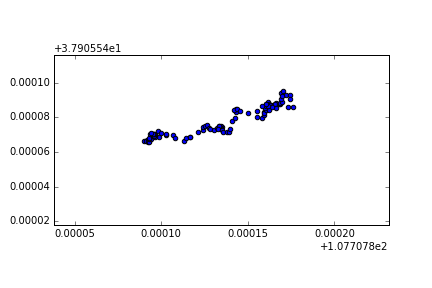

In [77]:
subset.plot()

In [72]:
subset.head()

,index,day.dec,latitude,N/S,longitude,E/W,GPSfix,NSats,HDOP,elevation,geom
0,0,736382.673322,37.905610,N,107.707907,W,1,7,3.33,3344.7,POINT (107.7079066666667 37.90561)
1,1,736382.673333,37.905610,N,107.707903,W,1,7,3.33,3344.1,POINT (107.7079026666667 37.90560983333334)
2,2,736382.673345,37.905609,N,107.707899,W,1,7,3.33,3343.6,POINT (107.7078988333333 37.90560883333333)
3,3,736382.673356,37.905608,N,107.707896,W,1,7,3.33,3343.3,POINT (107.7078963333333 37.9056085)
4,4,736382.673368,37.905607,N,107.707892,W,1,7,3.33,3342.7,POINT (107.7078916666667 37.90560716666667)
